In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [182]:
import numpy as np
import pandas as pd

class LinearRegression:
    def __init__(self, learning_rate=0.00001, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.coef = None

    def fit(self, X, y):
        n = len(X)
        m = 0
        b = 0

        for _ in range(self.num_epochs):
            m_gradient = 0
            b_gradient = 0

            for i in range(n):
                x_i = X.iloc[i]
                y_i = y.iloc[i]
                m_gradient += (-2 / n) * x_i * (y_i - (m * x_i + b))
                b_gradient += (-2 / n) * (y_i - (m * x_i + b))

            temp_m = m - m_gradient * self.learning_rate
            temp_b = b - b_gradient * self.learning_rate

            m = temp_m
            b = temp_b

        self.coef = (m, b)

    def predict(self, X):
        if self.coef is None:
            raise ValueError("Model has not been trained yet. Please call fit() first.")
        
        m, b = self.coef
        return X * m + b




In [183]:
data = pd.read_csv("/Users/rujutajoshi/Sources/GitHub/Task 2/advertising.csv")
data.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [185]:
data.shape

(200, 4)

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [187]:
data.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [188]:
data.isna()

TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]

In [189]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

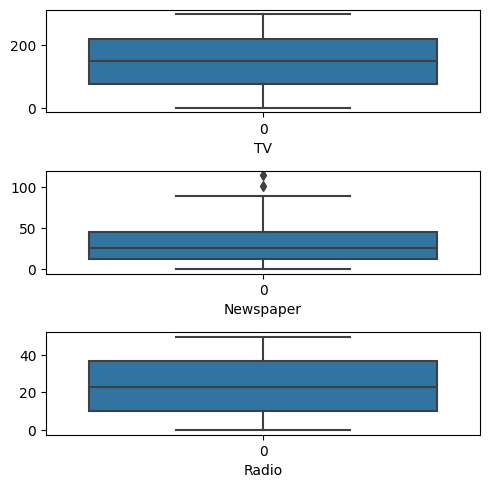

In [190]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt1.set_xlabel('TV')
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt2.set_xlabel('Newspaper')
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt3.set_xlabel('Radio')
plt.tight_layout()



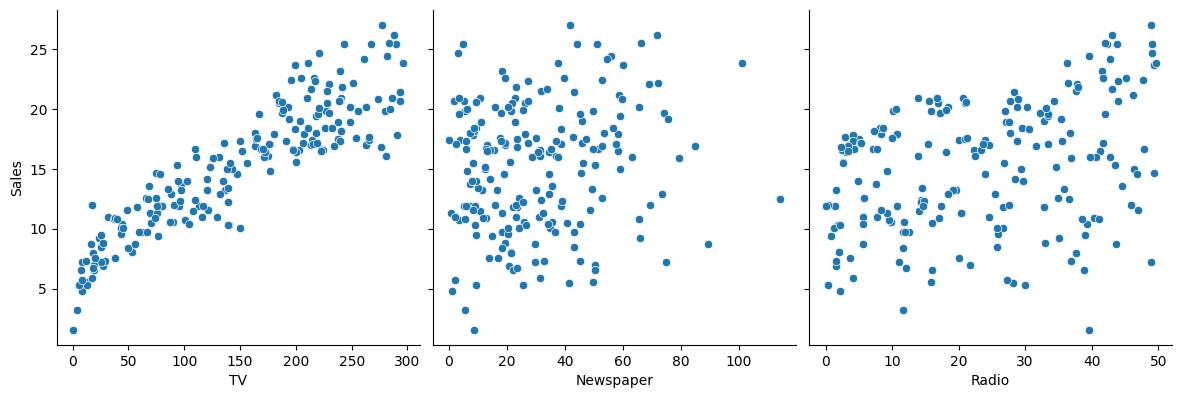

In [191]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

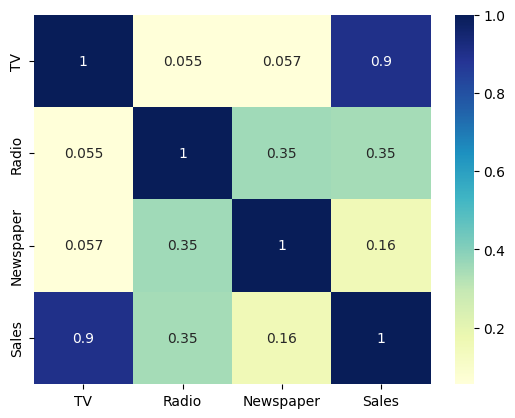

In [192]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)

In [193]:
data.drop(["Radio","Newspaper"],axis=1,inplace=True)

In [194]:
data

TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2   12.0
3    151.5   16.5
4    180.8   17.9
..     ...    ...
195   38.2    7.6
196   94.2   14.0
197  177.0   14.8
198  283.6   25.5
199  232.1   18.4

[200 rows x 2 columns]

In [195]:
data.isnull().sum()


TV       0
Sales    0
dtype: int64

In [196]:
x = data.drop(["Sales"],axis=1)
y = data["Sales"]

In [249]:
X_train , X_test , y_train , y_test = train_test_split(x,y,train_size=0.80,random_state = 42)

In [198]:
standardscaler = StandardScaler()
x_train = standardscaler.fit(X_train)
x_test = standardscaler.fit_transform(X_test)

In [199]:
X_train.head()
type(X_train)

pandas.core.frame.DataFrame

In [200]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [201]:
X_test.head()

TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3

In [202]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [213]:
linearregression = LinearRegression()
linearregression.fit(X_train,y_train)

In [204]:
predictions = linearregression.predict(X_test)

In [205]:
predictions

TV
95   14.868003
15   17.783949
30   26.640794
158   1.096744
128  20.045851
115   6.855964
69   19.727913
170   4.575894
174  20.236614
45   15.939908
66    2.895364
182   5.139099
165  21.335771
78    0.524455
186  12.706024
177  15.494795
56    0.697050
152  17.983796
82    6.874132
68   21.599205
124  20.881574
16    6.192836
148   3.485821
93   22.825538
65    6.301844
60    4.893832
84   19.428143
67   12.687856
125   7.955121
132   0.796973
9    18.183642
18    6.320011
55   18.101887
75    1.569109
150  25.532553
104  21.671877
135   4.421467
137  24.896677
164  10.680305
76    2.532007

In [206]:

predictions.shape

(40, 1)

Text(0.5, 1.0, 'Linear Regression')

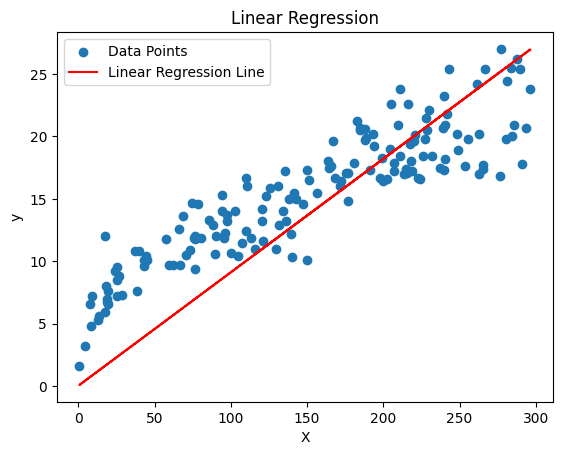

In [207]:

plt.scatter(X_train, y_train, label='Data Points')


# Plot the linear regression line
y_pred_line = linearregression.predict(X_train)

plt.plot(X_train, y_pred_line, color='red', label='Linear Regression Line')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')






In [37]:

plt.scatter(X_test, y_test, label='Data Points')


# Plot the linear regression line
y_pred_line = linearregressio.predict(X_test)

plt.plot(X_test, y_pred_line, color='red', label='Linear Regression Line')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')






Text(0.5, 1.0, 'Linear Regression')

In [260]:
y_predict_train = linearregression.predict(X_train)


In [270]:
y_train.shape


(160,)

In [271]:
#y_predict_train = y_predict_train.to_numpy()
#y_train = y_train.to_numpy()
y_predict_train = y_predict_train.reshape(160, )
residuals = (y_train - y_predict_train)
residuals = pd.DataFrame(residuals)

In [272]:
residuals

0
0    0.428703
1   -1.312503
2    6.150898
3    4.006781
4   -3.781957
..        ...
155  4.895092
156  0.425748
157 -0.409668
158  2.523066
159 -5.687134

[160 rows x 1 columns]

In [291]:
#y_test = y_test.to_numpy()
#predictions = predictions.to_numpy()
predictions_array = predictions.reshape(40, )
residuals_test = (y_test - predictions_array)
residuals_test = pd.DataFrame(residuals_test)


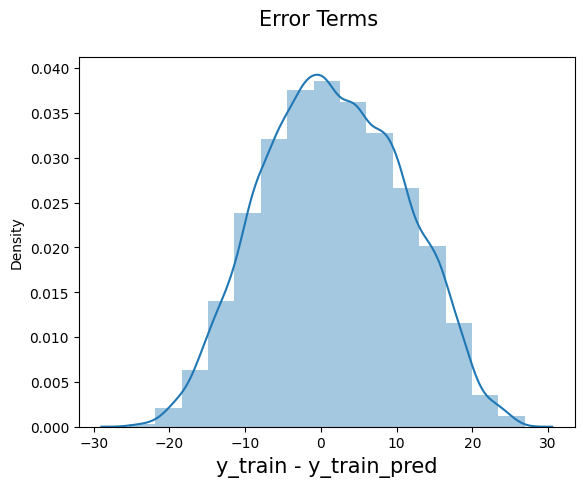

In [241]:
fig = plt.figure()
sns.distplot(residuals, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

In [273]:
plt.scatter(X_train, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

In [277]:

plt.scatter(X_test, residuals_test)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

In [278]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [279]:
mean_squared_error(y_test, predictions)

20.554411900635337

In [280]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [281]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, predictions))

4.53369737638446

In [282]:
r_squared = r2_score(y_test, predictions)
r_squared

0.3348323554619306

<h1>Linear Regression using OLS/h

In [1]:
import statsmodels.api as sm


In [284]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [285]:
lr.params


const    7.007108
TV       0.055483
dtype: float64

In [286]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.71e-59
Time:                        15:16:17   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

In [287]:
# Add a constant to get an intercept
X_test_sm = sm.add_constant(X_test)
# Fit the resgression line using 'OLS'
lr_test = sm.OLS(y_test, X_test_sm).fit()

In [290]:
y_pred = lr_test.predict(X_test_sm)


In [288]:
print(lr_test.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     155.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.30e-15
Time:                        15:16:20   Log-Likelihood:                -92.823
No. Observations:                  40   AIC:                             189.6
Df Residuals:                      38   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8778      0.719      9.566      0.0